In [2]:
import nltk
import re
import pandas as pd
import numpy as np
import string



pd.set_option('display.max_columns',None)

In [3]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [4]:
import  numpy as np
import pandas as pd

In [5]:
df_train=pd.read_csv('train.csv')

# Analyze the data

In [6]:
#shape of the data

print('number of rows and columns in the dataset is {}'.format(df_train.shape))

number of rows and columns in the dataset is (7613, 5)


In [7]:
#How many of them are real and non real disasters
print("Out of {} rows \n {} are real disasters \n {} are not real disasters\n in train dataset".format(len(df_train),
                                                       len(df_train[df_train['target']==1]),
                                                       len(df_train[df_train['target']==0])))

Out of 7613 rows 
 3271 are real disasters 
 4342 are not real disasters
 in train dataset


In [8]:
#How many missing data per each column

print('Number of missing values in column-Keyword is {}'.format(df_train['keyword'].isnull().sum()))
print('Number of missing values in column-location is {}'.format(df_train['location'].isnull().sum()))
print('Number of missing values in column-text is {}'.format(df_train['text'].isnull().sum()))
print('Number of missing values in column-target is {}'.format(df_train['target'].isnull().sum()))

Number of missing values in column-Keyword is 61
Number of missing values in column-location is 2533
Number of missing values in column-text is 0
Number of missing values in column-target is 0


# Data Visualization

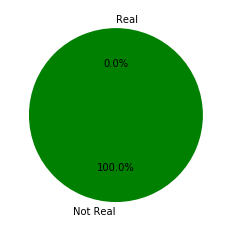

In [64]:
import matplotlib.pyplot as plt
real_fake = [len(df_train[df_train['target']==1]),len(df_train[df_train['target']==0])]
activities = ['Real', 'Not Real']
colors = ['r', 'g']
plt.pie(real_fake, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [10]:



custom_stop_list = []
stopword_set = nltk.corpus.stopwords.words('english')+custom_stop_list+['url']
wn = nltk.WordNetLemmatizer()


In [11]:
def preProcess(iter):
        # remove extra space
        regex_ws=re.compile("\s+")
        ret=regex_ws.sub(" ",iter)
        #ret=ret.replace("&amp;","&").replace("&lt;","<").replace("&gt;",">")
        #text="".join([word for word in text if word not in string.punctuation])
        
        #Replace URL
        regexp="(https?:\/\/(?:www\.|(?!www)|(?:xmlns\.))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"
        ret=re.sub(regexp,"url",ret)
       
        #replace @addresses
        regexp='@[A-z0-9_]+'
        ret=re.sub(regexp,"@twitterhandle",ret)
        
        #Split on punctuations
        ret1=re.split("[,_, \<>!\?\.:\n\"=*/]+",ret)
        
        #Remove Stopwords
        ret2=[word for word in ret1 if word not in stopword_set]
        ret2=" ".join(ret2)
        
        #Remove  numbers
        ret2=re.sub(r"(\s\d+)"," ",ret2)
        
        return ret2

In [12]:
df_train['body_text_nostop']=df_train['text'].apply(lambda x: preProcess(x.lower()))

In [13]:
import string
string.punctuation

def remove_punctuation(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct



In [14]:
df_train['body_text_nopunct']=df_train['body_text_nostop'].apply(lambda x:remove_punctuation(x))

In [15]:
df_train.head()

,id,keyword,location,text,target,body_text_nostop,body_text_nopunct
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 people receive #wildfires evacuation order...,13 people receive wildfires evacuation orders...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,got sent photo ruby alaska smoke wildfires pou...


In [16]:
features_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df_train[feature].isnull().mean(),4)))

keyword: 0.008% missing values
location: 0.3327% missing values


In [17]:
def replace_miss_value(df_train,features_nan):
    data=df_train.copy()
    data[features_nan]=data[features_nan].fillna('missing')
    return data


df_train=replace_miss_value(df_train,features_nan)

df_train.isnull().sum()

id                   0
keyword              0
location             0
text                 0
target               0
body_text_nostop     0
body_text_nopunct    0
dtype: int64

In [18]:
df_train.head()

,id,keyword,location,text,target,body_text_nostop,body_text_nopunct
0,1,missing,missing,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,4,missing,missing,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,missing,missing,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,residents asked shelter place notified officer...
3,6,missing,missing,"13,000 people receive #wildfires evacuation or...",1,13 people receive #wildfires evacuation order...,13 people receive wildfires evacuation orders...
4,7,missing,missing,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,got sent photo ruby alaska smoke wildfires pou...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#from scipy.sparse import hstack

In [21]:

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    norm='l2',
    min_df=0,
    smooth_idf=False,preprocessor=preProcess,
    max_features=30000)

In [22]:

train_text = df_train['body_text_nopunct']


In [23]:

char_vectorizer.fit(train_text)

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=30000,
                min_df=0, ngram_range=(2, 6), norm='l2',
                preprocessor=<function preProcess at 0x0000027E1DF7F730>,
                smooth_idf=False, stop_words='english', strip_accents='unicode',
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [24]:
train_char_features = char_vectorizer.transform(train_text)

In [25]:
train_char_features.shape

(7613, 30000)

In [26]:
#sparse matrix
X_Tfidf_df=pd.DataFrame(train_char_features.toarray())
X_Tfidf_df.columns = char_vectorizer.get_feature_names()


In [27]:
X_Tfidf_df.shape

(7613, 30000)

In [28]:
X=X_Tfidf_df
y=df_train['target']

In [29]:
X.shape

(7613, 30000)

In [30]:
y.shape

(7613,)

In [31]:
df_train=pd.DataFrame(X,y)

# PreProcess the test data

In [47]:
df_test=pd.read_csv('test.csv')




In [48]:
df_test['body_text_nostop']=df_test['text'].apply(lambda x: preProcess(x.lower()))

In [49]:
df_test['body_text_nopunct']=df_test['body_text_nostop'].apply(lambda x:remove_punctuation(x))

In [50]:
test_text = df_test['body_text_nopunct']

In [51]:
test_char_features = char_vectorizer.transform(test_text)

In [52]:
#sparse matrix
X_Tfidf_dft=pd.DataFrame(test_char_features.toarray())
X_Tfidf_dft.columns = char_vectorizer.get_feature_names()

In [53]:
X_test=X_Tfidf_dft



# Logistic Regression

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [42]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold,scoring='f1')
print("F1 score: %.2f%%" % (results_skfold.mean()*100.0))


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 61.70%


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state =5)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.f1_score(y_test,y_pred)

C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7409879839786382

In [61]:
Y_pred = model.predict(X_test)

In [62]:
pred=pd.DataFrame(Y_pred)
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','target']
datasets.to_csv('sample_submission2.csv',index=False)

# K Nearest Neighbours

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state =5)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.7578781512605042

In [45]:
metrics.f1_score(y_test,y_pred)

0.692871419053964

In [54]:
Y_pred = knnclassifier.predict(X_test)

In [ ]:
sub_df=pd.read_csv('sample_submission.csv')

In [58]:
pred=pd.DataFrame(Y_pred)
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','target']
datasets.to_csv('sample_submission1.csv',index=False)

# XGBoost

In [65]:
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
 
import xgboost as xgb

In [66]:


import xgboost as xgb
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state =5)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
metrics.f1_score(y_test,y_pred)
 


0.6875871687587168

In [67]:
Y_pred = xgb_model.predict(X_test)

In [68]:
pred=pd.DataFrame(Y_pred)
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','target']
datasets.to_csv('sample_submission3.csv',index=False)

In [ ]:
# Cross validation scores
f1_scores = model_selection.cross_val_score(xgb_model, X, y, cv=skfold,scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))